# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**
- научиться определять рыночную стоимость объектов недвижимости

**Задача:**
- установить параметры, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность

**Описание данных**
- `rports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


### Откроем файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

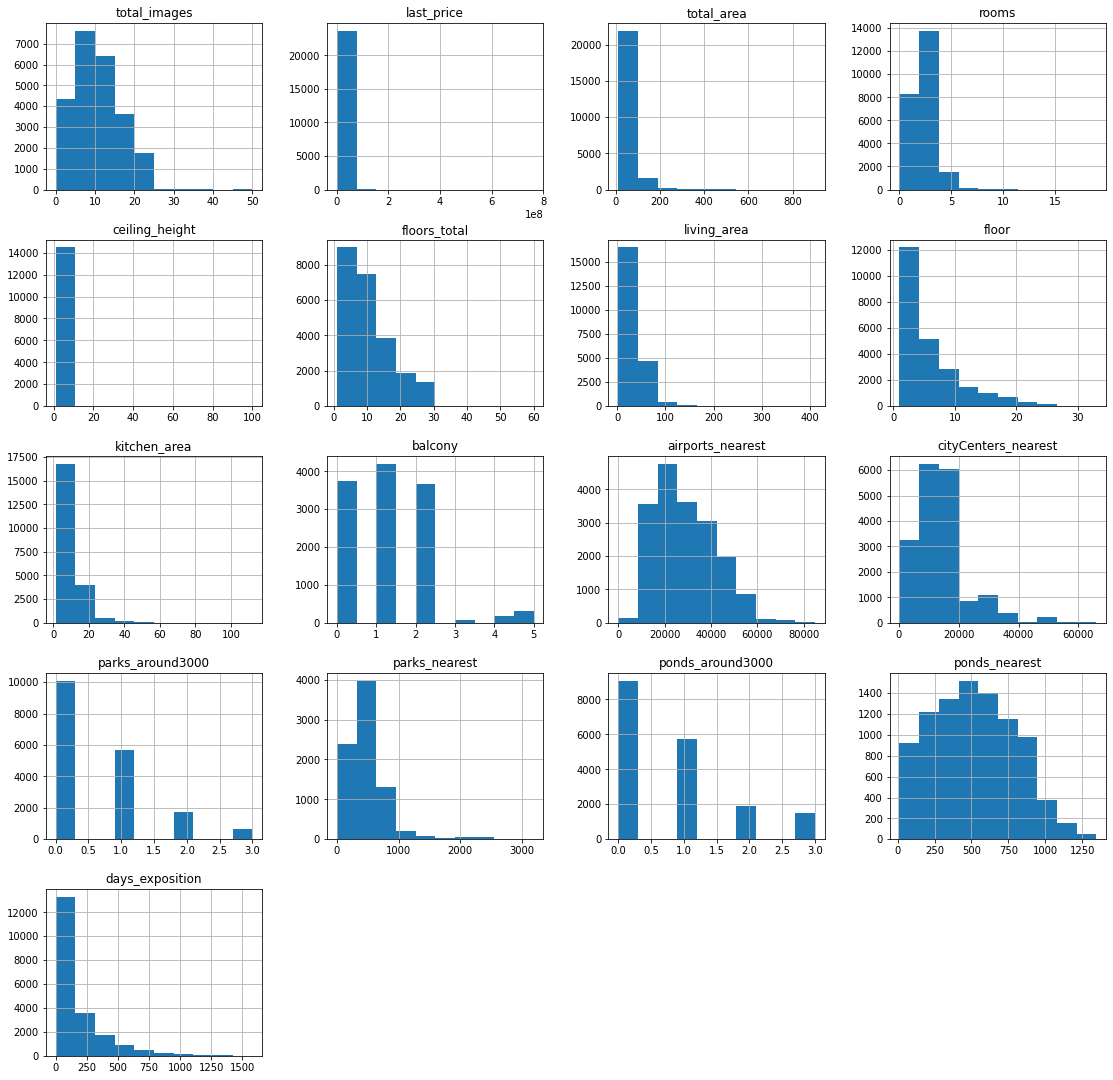

In [6]:
data.hist(figsize=(19, 19))
plt.show();

**Вывод**

Во многих столбцах есть пропуски, некоторые типы данных неудобны для дальнейшей работы. Исправим))

### Предобработка данных

#### Изучим пропуски в исходной таблице

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменяем все значения `NaN` в столбце `balcony` на 0:**

In [8]:
data['balcony'] = data['balcony'].fillna(0.0)

In [9]:
data['is_apartment'] = data['is_apartment'].fillna('False')

**Проверка**

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заменяем все значения `NaN` в столбце `ponds_around3000` на 0:**

In [11]:
data['ponds_around3000'].isna().sum()

5518

In [12]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)

В таблице довольно много пропусков. У разных столбцов могут быть разные причины. Так, например, высоту потолков и количество этажей в доме продавцы могли забыть указать или не придать этому значение. То же касается `living_area` и `kitchen_area`.

В столбце `is_apartment` могла, например, присутствовать галочка, является ли квартира аппартаментами или не является, поэтому большинство объявлений получились с пропусками.

Данные о нахождении рядом аэропорта или озера в 49 случаях не могли быть определены, так как не указано `locality_name`. В большинстве же случаев могли быть сбои системы или картографические огрехи.

#### Изучим тип данных каждого столбца

**Заменим тип данных в столбце `balcony` на `int`**

In [13]:
data['balcony'] = data['balcony'].astype('int')

**Заменим тип данных в столбце `last_price` на `int`**

In [14]:
data['last_price'] = data['last_price'].astype('int')

**Заменим тип данных в столбце `first_day_exposition` на `datetime`**

In [15]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [17]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод**

Замена типа данных была произведена для того, чтобы была возможность работать со временем. Например, сделать выборку по месяцам или по дням. 

#### Устранение неявных дубликатов

**Устраним неявные дубликаты с столбце `locality_name`**

In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
def categorize_of_locality_name(row):
    try:
        if 'Рябов' in row:
            return 'поселок городского типа Рябово'
        elif 'Тельман' in row:
            return 'посёлок Тельмана'
        elif 'Янино-1' in row:
            return 'городской посёлок Янино-1'
        elif 'Кудров' in row:
            return 'Кудрово'
        elif 'Лесное' in row:
            return 'коттеджный посёлок Лесное'
        elif 'Бугр' in row:
            return 'посёлок Бугры'
        elif 'Возрождение' in row:
            return 'посёлок Возрождение'
        elif 'Лисий Нос' in row:
            return 'посёлок Лисий Нос'
        elif 'Мельниково' in row:
            return 'посёлок Мельниково'
        elif 'Мурино' in row:
            return 'посёлок Мурино'
        elif 'Мичуринское' in row:
            return 'посёлок Мичуринское'
        elif 'Новый Свет' in row:
            return 'посёлок Новый Свет'
        elif 'Пансионат Зелёный Бор' in row:
            return 'посёлок Пансионат Зелёный Бор'
        elif 'Парголово' in row:
            return 'посёлок Парголово'
        elif 'Петро-Славянка' in row:
            return 'посёлок Петро-Славянка'
        elif 'Победа' in row:
            return 'посёлок Победа'
        elif 'Терволово' in row:
            return 'посёлок Терволово'
        elif 'Усть-Луга' in row:
            return 'посёлок Усть-Луга'
        else:
            return row
                       
    except:
        return row
    
    
    
    
    
    

In [20]:
data['locality_name'] = data['locality_name'].apply(categorize_of_locality_name)

In [21]:
data['locality_name'].head(40)

0                         Санкт-Петербург
1                          посёлок Шушары
2                         Санкт-Петербург
3                         Санкт-Петербург
4                         Санкт-Петербург
5               городской посёлок Янино-1
6                       посёлок Парголово
7                         Санкт-Петербург
8                          посёлок Мурино
9                         Санкт-Петербург
10                        Санкт-Петербург
11                              Ломоносов
12                              Сертолово
13                               Петергоф
14                                 Пушкин
15                        Санкт-Петербург
16                        Санкт-Петербург
17                        Санкт-Петербург
18                        Санкт-Петербург
19                        Санкт-Петербург
20                      посёлок Парголово
21                        Санкт-Петербург
22                                Кудрово
23                        Санкт-Пе

#### Обработка аномалий 

In [22]:
data.loc[data['ceiling_height'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,0.0,NaN,259.0
464,15,66571000,280.3,2015-06-11,6,5.2,8.0,159.5,7,False,...,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000,310.0,2018-10-12,5,5.3,3.0,190.0,3,False,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000,399.0,2015-01-21,5,5.6,6.0,NaN,6,False,...,NaN,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3474,3,1400000,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,0.0,NaN,125.0
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,0.0,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,0.0,NaN,540.0


In [23]:
data.loc[data['ceiling_height'] > 10.3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,0.0,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,0.0,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,0.0,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


In [24]:
data['ceiling_height'].median()

2.65

In [25]:
data.loc[data['ceiling_height'] > 10.3, 'ceiling_height'] = 2.65 #заменил здесь условие

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Не бывает во многоэтажных домах квартир с высотой потолков 20 метров, 25 и тем более 32. Проверили, есть ли квартиры с высотой потолков больше 5 метров. Самое крайнее число, которое еще не считаем аномальным взяли равным 10.3 метра. Они есть. 
Далее нашли медиану, и перезаписали во все квартиры выше 10.3 метров медианное значение 2.65 м.

In [29]:
data['days_exposition'].describe()# здесь я перебирал разные столбцы, смотрел на данные, есть ли какие-то аномалии 

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [30]:
data[data['days_exposition'] > 730]# объявления, которые висели больше 2 лет 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
42,13,22000000,161.80,2015-07-08,4,2.80,4.0,80.90,2,False,...,17.60,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
43,13,9330000,48.00,2017-01-10,2,3.00,4.0,28.00,4,False,...,7.50,0,Санкт-Петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0
98,11,11700000,80.00,2014-12-10,3,NaN,5.0,55.10,3,False,...,11.00,0,Санкт-Петербург,11248.0,8767.0,1.0,666.0,0.0,NaN,831.0
109,2,7497600,62.50,2015-12-08,2,NaN,5.0,35.50,5,False,...,9.50,0,Пушкин,14517.0,26670.0,1.0,517.0,0.0,NaN,1048.0
145,6,8290000,77.00,2015-09-21,2,2.77,16.0,40.00,5,False,...,10.00,1,Санкт-Петербург,30012.0,7384.0,0.0,NaN,1.0,260.0,807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23588,7,8100000,69.00,2015-10-14,2,NaN,10.0,NaN,8,False,...,10.00,2,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,823.0
23598,8,4300000,33.40,2016-03-29,1,2.58,20.0,15.10,6,False,...,8.60,0,Санкт-Петербург,33695.0,14794.0,0.0,NaN,0.0,NaN,971.0
23638,8,4920000,76.26,2014-12-25,3,NaN,15.0,42.55,13,False,...,10.18,0,посёлок Мурино,NaN,NaN,NaN,NaN,0.0,NaN,939.0
23664,5,9000000,110.00,2015-12-10,4,3.36,7.0,64.60,5,False,...,15.80,0,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0


**Удалим квартиры, в которых больше 3 балконов**

In [31]:
data.loc[data['balcony'] > 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.00,2016-05-04,3,NaN,14.0,59.0,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000,161.80,2015-07-08,4,2.80,4.0,80.9,2,False,...,17.6,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
116,18,10999000,97.20,2017-11-13,3,2.50,16.0,NaN,16,False,...,18.3,5,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0
121,20,33000000,180.00,2017-02-17,3,2.90,9.0,86.0,8,False,...,24.0,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
250,13,3200000,51.70,2019-01-22,2,2.65,16.0,29.2,5,False,...,7.7,4,Всеволожск,NaN,NaN,NaN,NaN,0.0,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,10,4300000,52.00,2019-04-21,1,2.70,16.0,28.0,8,False,...,11.0,5,посёлок Мурино,NaN,NaN,NaN,NaN,0.0,NaN,NaN
23474,16,5900000,40.50,2019-03-16,2,2.73,17.0,31.0,16,False,...,5.0,4,Санкт-Петербург,19901.0,21613.0,0.0,NaN,1.0,1003.0,NaN
23497,17,6150000,55.40,2019-04-22,2,2.80,20.0,29.4,16,False,...,9.6,4,Санкт-Петербург,16285.0,13873.0,0.0,NaN,1.0,481.0,NaN
23526,14,5800000,60.69,2018-03-13,3,2.50,9.0,39.7,2,False,...,6.2,5,Санкт-Петербург,51239.0,15954.0,0.0,NaN,0.0,NaN,30.0


In [32]:
len(data)

23699

In [33]:
data = data[data['balcony'] <= 3]

In [34]:
len(data)

23212

In [35]:
14492 - 14121 #проверка, не удалили ли чего лишнего 
#прошла успешно

371

**Проверка на дубликаты**

In [36]:
data.duplicated().sum()

0

**Особенности, которые удалось обнаружить:**

- в столбце `locality_name` довольно много неявных дубликатов, от большей части которых удалось избавиться;
- существует 230 квартиры с 5-ю балконами, приэтом далеко не все из этих квартир большие по площади. Природа этого явления не очень понятна, объекты с более чем 3-мя балконами удалили;
- также были обнаружены аномалии с высотой потолка в столбце `ceiling_height`. Их высота 25, 26, 32 метра. Такие значения заменили на медианное;
- существуют очень дорогие квартиры, чья стоимость превышает 200 миллионов рублей. На первый взгляд обнаружена корреляция с метражом и количеством комнат, поэтому данные не были изменены;
- очень смущают квартиры, которые висели в объявлении больше двух лет (таких аж 488, это более 3% от всех), в то время как в среднем квартира продавалась за 248 дней. 

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23212 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23212 non-null  int64         
 1   last_price            23212 non-null  int64         
 2   total_area            23212 non-null  float64       
 3   first_day_exposition  23212 non-null  datetime64[ns]
 4   rooms                 23212 non-null  int64         
 5   ceiling_height        14132 non-null  float64       
 6   floors_total          23126 non-null  float64       
 7   living_area           21337 non-null  float64       
 8   floor                 23212 non-null  int64         
 9   is_apartment          23212 non-null  object        
 10  studio                23212 non-null  bool          
 11  open_plan             23212 non-null  bool          
 12  kitchen_area          20947 non-null  float64       
 13  balcony         

### Посчитаем и добавим в таблицу новые столбцы

#### Цена одного квадратного метра

In [38]:
data['cost_per_m^2'] = round(data['last_price'] / data['total_area'], 2) # добавили стоимость м^2 и 
#округлили до 2 знаков после точки 

In [39]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m^2
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [40]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m^2,weekday
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1


#### Месяц публикации объявления

In [42]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Год публикации объявления

In [43]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [44]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m^2,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


#### Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [45]:
def function_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return "первый"
    
    if floors_total == floor:
        return "последний"
    
    return "другой"

In [46]:
data['floor_type'] = data.apply(function_floor, axis = 1)

In [47]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m^2,weekday,month,year,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


#### Расстояние до центра города в километрах (переведённое из метров в километры и округлённое до целых значений)

In [48]:
data['cityCenters_nearest_KM'] = data['cityCenters_nearest'] // 1000

In [49]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_m^2,weekday,month,year,floor_type,cityCenters_nearest_KM
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,18.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,13.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,6.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведём исследовательский анализ данных

#### Построим и изучим гистограммы 


- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров. Опишем все наблюдения по параметрам.

**Общая площадь**

<AxesSubplot:>

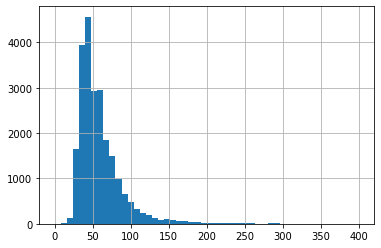

In [50]:
data['total_area'].hist(bins=50, range=(0, 400))

**Наблюдения**

Большинство квартир около 40-90 м^2. Также встречаются большие квартиры по 300, 400, 600 и даже 900 квадратных метров.

**Жилая площадь**

<AxesSubplot:>

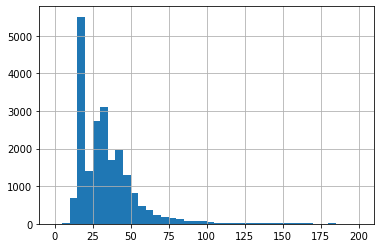

In [51]:
data['living_area'].hist(bins=40, range=(0,200))

**Наблюдения**

Пик приходится примерно на 30-35 м^2. Максимальная 409 квадратных метров. Но при этом есть второй пик на уровне в 15-20 метров.

**Площадь кухни**

<AxesSubplot:>

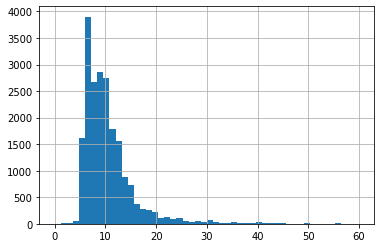

In [52]:
data['kitchen_area'].hist(bins=50, range=(0, 60))

**Наблюдения**

Пик приходится на значения от 6 до 11 метров. Есть и большие кухни в 40, 55 метров.

**Цена объекта**

<AxesSubplot:>

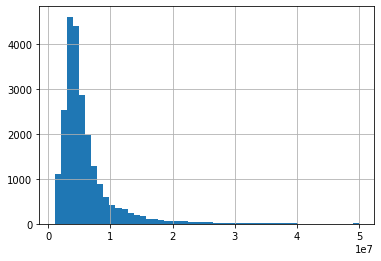

In [53]:
data['last_price'].hist(bins=50, range=(1000000, 50000000))

In [54]:
data['last_price'].median()

4600000.0

In [55]:
data['last_price'].mean()

6480258.746941238

**Наблюдения**

Не смог подобрать удобные для просмотра значения, поэтому рассчитал медиану и среднее. По гистограмме видно, что есть пик в районе 3 - 5 миллионов, но есть и квартиры сило дороже, которые здесь можно назвать выбросами, из-за чего среднее сильно и поднимается.

**Количество комнат**

<AxesSubplot:>

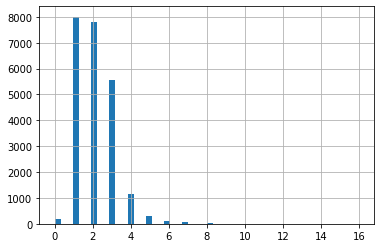

In [56]:
data['rooms'].hist(bins=50, range=(0, 16))

In [57]:
data['rooms'].max()

19

**Наблюдения**

Основная масса квартир однокомнатные, двухкомнатные или трёхкомнатные. Самая большая - 16-ти комнатная квартира.

**Высота потолков**

<AxesSubplot:>

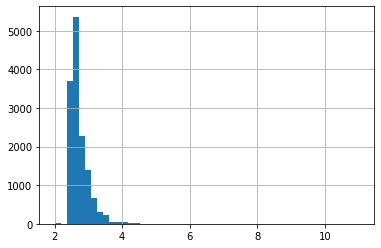

In [58]:
data['ceiling_height'].hist(bins=50, range=(2, 11))

**Наблюдения**

Из предобработки мы помним значение медианы, а теперь и видим его на гистограмме - 2.65 метра - средняя высота потолков.

**Этаж квартиры**

<AxesSubplot:>

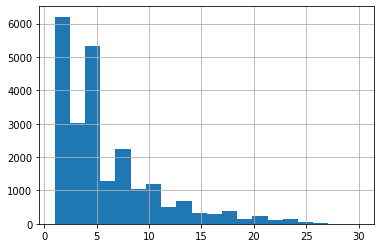

In [59]:
data['floor'].hist(bins=20, range=(1, 30))

In [60]:
data['floor'].max()

33

**Наблюдения**

Так как не все дома многоэтажные, пик приходится на 2-5 этажи. А дальше почти чем выше этаж, тем реже встречается. 7-8-ых этажей еще чуть больше, чем остальных соседних. Проверили максимальное значение этажа, чтобы выставить `range` комфортнее.

**Тип этажа квартиры («первый», «последний», «другой»)**

<AxesSubplot:>

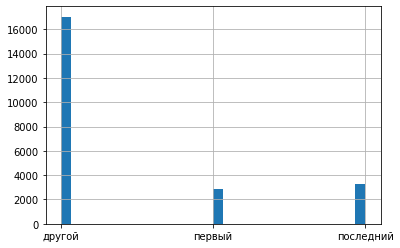

In [61]:
data['floor_type'].hist(bins=30)

**Наблюдения**

Первые и последние этажи встречаются довольно редко.

**Общее количество этажей в доме**

<AxesSubplot:>

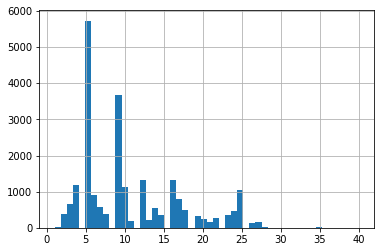

In [62]:
data['floors_total'].hist(bins=50, range=(1, 40))

**Наблюдения**

Не удивительно, что пяти и девятиэтажек больше всего.

**Расстояние до центра города в метрах**

<AxesSubplot:>

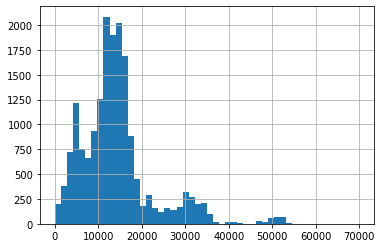

In [63]:
data['cityCenters_nearest'].hist(bins=50, range=(0, 70000))

**Наблюдения**

В основном центр находится в пределах 18 км. Чаще всего это 11-15 километров.

**Расстояние до ближайшего аэропорта**

<AxesSubplot:>

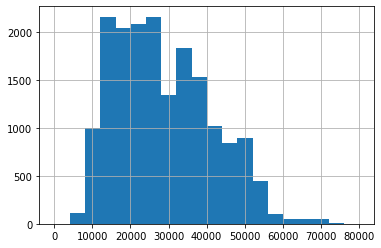

In [64]:
data['airports_nearest'].hist(bins=20, range=(100, 80000))

**Наблюдения**

Аэропорт находится далеко. Это и не так плохо, не будет большого потока машин и шума от самолетов. Точного пика на гистограмме нет, но большая часть значений приходятся на 13000-40000 метров.

**Расстояние до ближайшего парка**

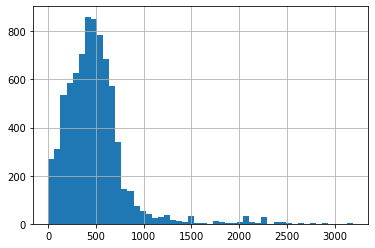

In [65]:
data['parks_nearest'].hist(bins=50)
plt.show();

**Наблюдения**

А вот парки как раз находятся недалеко! У многих они прям рядом с домом, но всё же большинству придется пройтись до парка около 500 метров.

**Месяц публикации объявления**

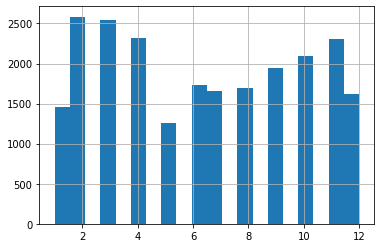

In [66]:
data['month'].hist(bins=20)
plt.show();

**Наблюдения**

Явной зависимости от месяца выставления в продажу нет. Однако всё же чаще это делали после нового года в феврали и марте.

**День публикации объявления**

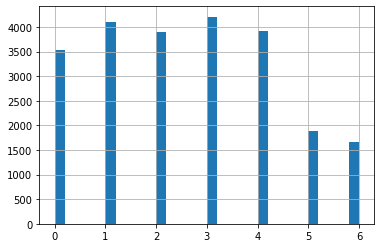

In [67]:
data['weekday'].hist(bins=30)
plt.show();

**Наблюдения**

Из этой гистограммы четко видно, что в рабочие дни люди, неудивительно, работают больше. На выходных гораздо реже выставляли квартиры на продажу.

#### Изучим, как быстро продавались квартиры. Посмотрим, сколько дней было размещено каждое объявление.

**Построим гистограмму**

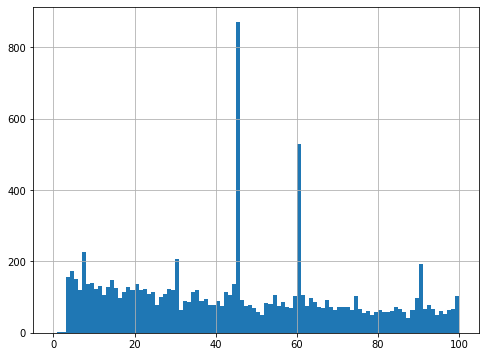

In [93]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(8, 6))
plt.show();

In [69]:
data['days_exposition'].median()

95.0

In [70]:
data['days_exposition'].describe()

count    20126.000000
mean       180.838468
std        219.835848
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Наблюдения**

Рассчитав медиану и посмотрев на гистограмму, мы видим, что обычно продажа занимает чуть больше 3-ёх месяцев, медианное значение равно 103 дням. Данные на графике показывает, что существуют продажи, осуществляемые намного дольше среднего. 

*Быстрыми продажами* будем считать те, которые меньше медианного значения или равны ему. *Необычно долгими* - продажи более 600 дней,это больше полутора лет! На гистограмме таких значений совсем мало, из чего можно смело выделить именно эту границу. 

Можем предположить, что с объявлениями тех квартир, которые продавались необычно долго, что-то не так. Возможно, была завышена цена, или же квартира не подходила под основные запросы пользователей, была "на любителя".

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Изучим, зависит ли цена от:**

**Общей площади**

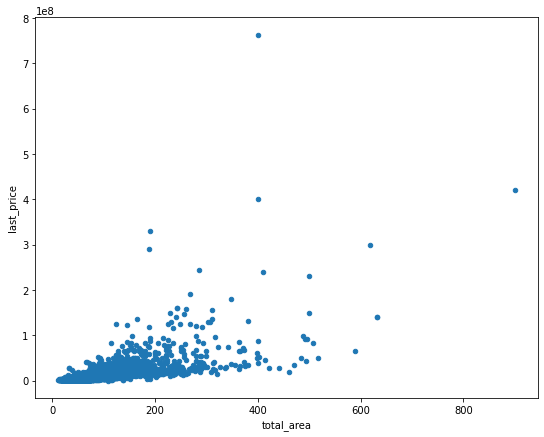

In [71]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', figsize=(9, 7))
plt.show();

**Корреляция Пирсона**

In [72]:
data['total_area'].corr(data['last_price'])

0.650833011138003

**Вывод**

Корреляция положительная и довольно большая. Цена однозначно зависит от площади. 

**Жилой площади**

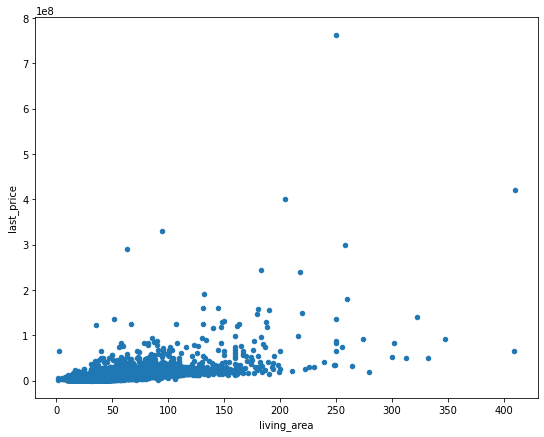

In [73]:
data.sort_values('living_area').plot(x='living_area', y='last_price', kind='scatter', figsize=(9, 7))
plt.show();

**Корреляция Пирсона**

In [74]:
data['living_area'].corr(data['last_price'])

0.5641698836652032

**Вывод**

Корреляция положительная и средняя. Цена зависит от жилой площади, но всё же меньше, чем от общей.

**Площади кухни**

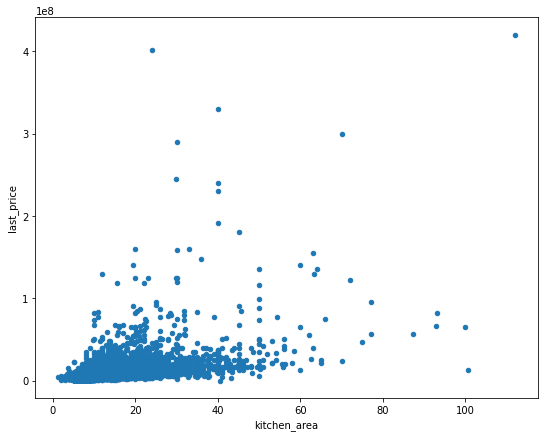

In [75]:
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(9, 7))
plt.show();

**Корреляция Пирсона**

In [76]:
data['kitchen_area'].corr(data['last_price'])

0.5194812715872276

**Вывод**

Contrl+C Contrl+V. Корреляция положительная и средняя. Цена зависит от кухонной площади, но всё же меньше, чем от общей.

**Количества комнат**

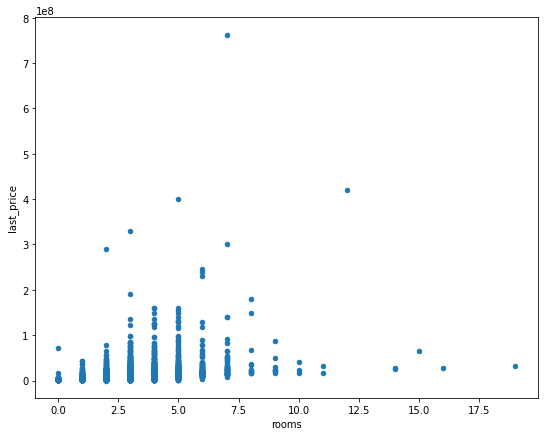

In [77]:
data.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter', figsize=(9, 7))
plt.show();

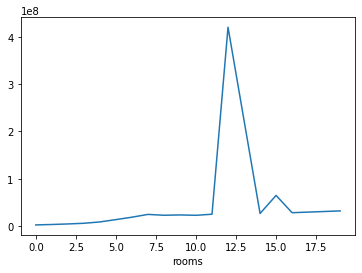

In [78]:
data.groupby('rooms')['last_price'].median().plot()
plt.show();

**Корреляция Пирсона**

In [79]:
data['rooms'].corr(data['last_price'])

0.3611108463901413

**Вывод**

Слабая корреляция. Цена мало зависит от количества комнат. 12-ти комнатная квартира здесь является выбросом. На нее не обращаем внимание, она такая одна.

**Этажа ("первый", "другой", "последний")**

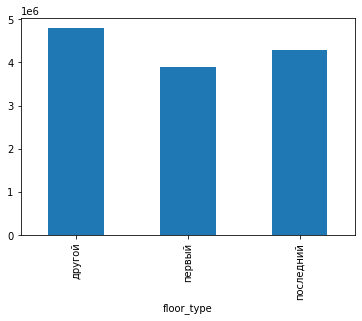

In [80]:
data.groupby('floor_type')['last_price'].median().plot(kind='bar')
plt.show();

**Вывод**

Квартиры на первом этаже стоят дешевле, чем квартиры на последнем, а те в свою очередь дешевле, чем на "других". Такое может быть из-за того, что с первого этажа не открывается вид на бесконечный мир, а на последних иногда протекает крыша :(

**Дня недели размещения объявления**

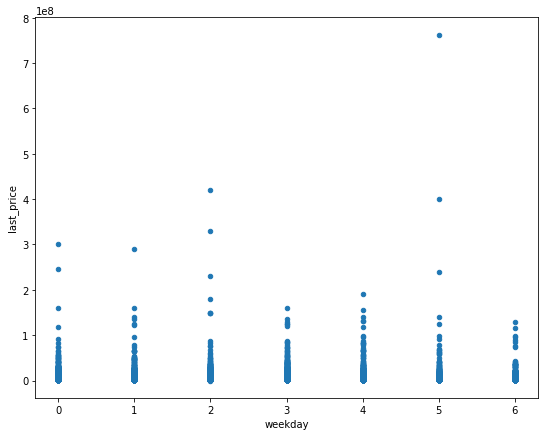

In [81]:
data.sort_values('weekday').plot(x='weekday', y='last_price', kind='scatter', figsize=(9, 7))
plt.show();

**Корреляция Пирсона**

In [82]:
data['weekday'].corr(data['last_price'])

0.0018751359229713385

**Вывод**

От дня недели цена не зависит. Не удивительно) Иначе бы все выкладывали в счастливые дни!

**Месяца размещения объявления**

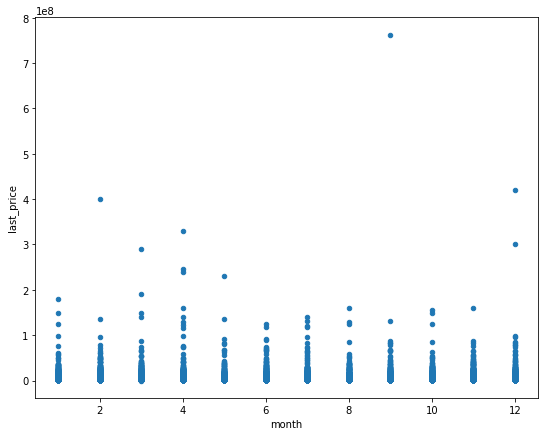

In [83]:
data.sort_values('month').plot(x='month', y='last_price', kind='scatter', figsize=(9, 7))
plt.show();

**Корреляция Пирсона**

In [84]:
data['month'].corr(data['last_price'])

0.0013184287554615544

**Вывод**

И от месяца тоже цена не зависит. А вот я бы всё-таки выкладывал лучше летом, так фотки получатся более солнечными и привлекательными 🙂

**Года размещения объявления**

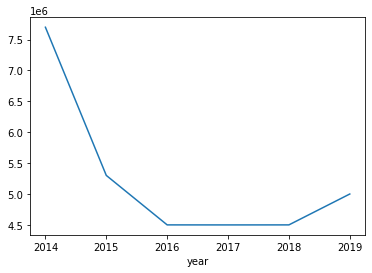

In [85]:
data.groupby('year')['last_price'].median().plot();

**Корреляция Пирсона**

In [86]:
data['month'].corr(data['last_price'])

0.0013184287554615544

**Вывод**

От года цена не зависит.

**Общие наблюдения**

Цена квартиры зависит от:
- общей площади
- кухонной и жилой площади
- типа этажа
- колчества комнат

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделияем населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [87]:
data_m_cost = data.pivot_table(index='locality_name', values='cost_per_m^2', aggfunc=['median', 'count'])
data_m_cost.columns = ['cost_per_m^2', 'count']
data_m_cost = data_m_cost.sort_values(by='count', ascending=False)
data_m_cost_top_10 = data_m_cost.head(10)
data_m_cost_top_10

,cost_per_m^2,count
locality_name,,
Санкт-Петербург,104627.770,15385
посёлок Мурино,86268.870,577
Кудрово,95791.450,466
посёлок Шушары,77049.180,431
Всеволожск,65789.470,386
Пушкин,100000.000,360
Колпино,74657.530,329
посёлок Парголово,91642.860,327
Гатчина,67671.510,296


In [94]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15385,5500000.0
посёлок Мурино,577,3400000.0
Кудрово,466,3875000.0
посёлок Шушары,431,3950000.0
Всеволожск,386,3450000.0
Пушкин,360,5150000.0
Колпино,329,3600000.0
посёлок Парголово,327,4100000.0
Гатчина,296,3040000.0


Топ самых дорогих квартир за м^2

In [88]:
data_m_cost_top_10.sort_values(by='cost_per_m^2', ascending=False).head(3)

,cost_per_m^2,count
locality_name,,
Санкт-Петербург,104627.77,15385
Пушкин,100000.00,360
Кудрово,95791.45,466


Топ объектов с самыми недорогими ценами за квадратный метр

In [89]:
data_m_cost_top_10.sort_values(by='cost_per_m^2').head(3)

,cost_per_m^2,count
locality_name,,
Выборг,58233.005,236
Всеволожск,65789.470,386
Гатчина,67671.510,296


#### Стоимость квадратного метра в Санкт-Петербурге

Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 

In [90]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

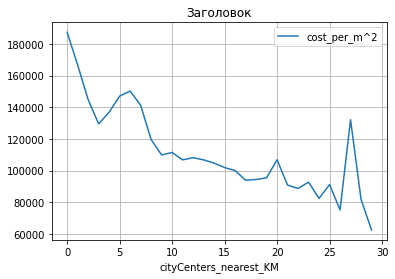

In [95]:
dependence_price_on_KM = data_spb.pivot_table(index='cityCenters_nearest_KM', values='cost_per_m^2')
dependence_price_on_KM.plot(grid = True, title = 'Заголовок')
plt.show();

**Вывод**

Из сводной таблицы мы видим, что чем квартира ближе к центру, тем она дороже. С отдалением цена за квадратный метр снижается. Исключение составляют 6-ой и 27-ой километр, на котором цена за метр подскакивает. Это могут быть дорогие районы или же выбросы.

### Общий вывод

В начале исследования были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. В них входили:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

В ходе предобработки были заменены пропуски в столбцах `ponds_around3000` и `balcony` на 0 и в стоблце `is_apartment` на `False`. Для дальнейшей более удобной работы со временем заменили тип данных в столбце `first_day_exposition` на `datetime`. 

Далее удалили неянвые дубликаты из `locality_name`, чтобы не было разных записей одного и того же населённого пункта. В высоте потолков `ceiling_height` были обнаружены слишком неправдоподобные записи в виде 25, 27, 32 метров, которые были заменены на медианное значение. В ходе проверки балконов так же удалили квартиры с более чем 3-мя балконами.

Для более удобного анализа в таблицу добавили следующие столбцы:
- цена квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления 
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- растояние до центра города в километрах


После предобработки приступили к исследованию. Были поставлены задачи:
1. Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости
2. Установить параметры, что позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность
3. Научиться определять рыночную стоимость объектов недвижимости



Построили и изучили гистограммы следующих параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

где выяснили, что большинсво квартир от 40 до 60 метров, с жилой площадью в среднем 25-50 метров  с кухней 6-11 квадратных метров. Средняя стоимость квартиры составляет 4600000 рублей, куда в основном входят одна, двух или трехкомнатные квартиры. Чаще всего квартиры находятся не на первом и не на посоледнем этажах, а на 2-5. Медианное значение потолков составляет 2.65.

Также в процессе исследования было выявленно, что квартиры на продажу выставляют в будние дни и ни день недели, ни месяц, ни год не влияют на стоимость продажи. В среднем объекты висят в объявлении 100-120 дней (3-4 месяца).

Выявили, что больше всего на стоимость квартиры влияет общая площадь с коэффицентом корреляции 0.65. Чуть меньше, но также влияют жилая площадь, площадь кухни и количество комнат в квартире. Узначи, что квартиры на первом этаже стоят дешевле, чем квартиры на последнем, а те в свою очередь дешевле, чем на остальных.

Помимо основных задач изучили стоимость квадратного метра в Санкт-Петербурге и ее зависимость от близости к центру города. Средняя цена за метр в СПб составляет ~ 104000 и с оттаделием от центра цена снижается, за исключением 6 и 27 километра. 

Также посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и вывели топ самых дорогих и самых доступных населенных пунктах, где в числе дорогих оказались Санкт-Петербург, Пушкин и Кудрово, а во втором - Выборг, Всеволожск и Гатчина.  

